Problem: Light II, Numerics Exercise #6 (Dust extinction)

In [54]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [9]:
UG = fits.open('https://dr16.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/1056/spec-1056-52764-0308.fits')
MCG = fits.open('https://dr16.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/0637/spec-0637-52174-0403.fits')

In [8]:
UG.info()

Filename: /Users/jiarongzhu/.astropy/cache/download/py3/cb85131dfb9e754e1f26058452e0d876
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3806R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [29]:
UG[1].data

FITS_rec([(12.981527 , 3.5826, 0.07985011, 0, 0, 1.2715085 , 5.9353547,  9.921628),
          (14.250547 , 3.5827, 0.07792066, 0, 0, 1.2713085 , 6.155205 ,  9.811051),
          (11.4173155, 3.5828, 0.08012941, 0, 0, 1.2711084 , 6.1845617, 10.531692),
          ...,
          (60.41707  , 3.9629, 0.17643414, 0, 0, 0.69450164, 2.4392743, 59.57307 ),
          (58.010418 , 3.963 , 0.18523094, 0, 0, 0.6943037 , 2.2720425, 59.692524),
          (58.61972  , 3.9631, 0.18145427, 0, 0, 0.69410634, 2.272368 , 59.691566)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [30]:
UG[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3806 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

After some exploration, we find the data we need, i.e. the spectra of UG10227 and MCG-01-53-020. Below I denote the two galaxies as 'UG#' and 'MCG#'.

In [89]:
loglam1 = np.array(UG[1].data['loglam'])
loglam2 = np.array(MCG[1].data['loglam'])
loglam = np.intersect1d(loglam1, loglam2) #two spectra has different wavelength range,
#so we have to find the overlap array of wavelength
i0 = np.array(np.where(loglam1==loglam[0])).item()
i1 = np.array(np.where(loglam1==loglam[-1])).item()
j0 = np.array(np.where(loglam2==loglam[0])).item()
j1 = np.array(np.where(loglam2==loglam[-1])).item()



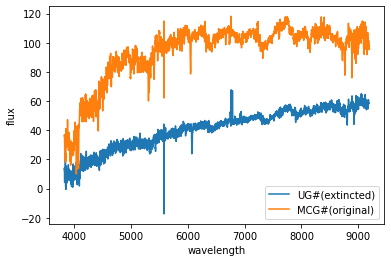

In [119]:
lam = np.power(10,loglam)
f_UG = np.array(UG[1].data['flux'][i0:i1+1])
f_MCG = np.array(MCG[1].data['flux'][j0:j1+1])

plt.figure()
plt.plot(lam,f_UG,label='UG#(extincted)')
plt.plot(lam,f_MCG,label='MCG#(original)')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.legend()
plt.show()


In [111]:
A = -2.5 * np.log10(np.abs(f_UG/f_MCG)) # abs() is used here to avoid invalid(negative) points


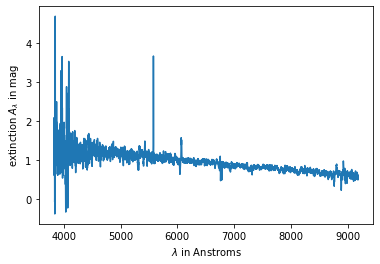

In [123]:
plt.figure()
plt.plot(lam,A)
plt.xlabel('$\lambda$ in Anstroms')
plt.ylabel('extinction $A_{\lambda}$ in mag')
#plt.plot(lam,lam*A)
plt.show()

This is the extinction as a function of wavelength. Note that some invalid points needs to be excluded.

To check if the extinction follows $\lambda^{-1}$, we can plot $\lambda A_{\lambda}$ as a function of $\lambda$ :



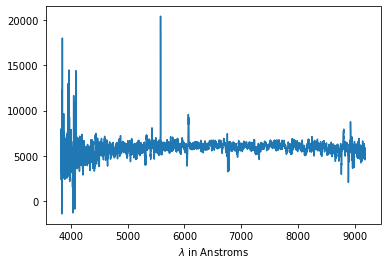

In [125]:
plt.figure()
plt.plot(lam,lam*A)
plt.xlabel('$\lambda$ in Anstroms')
plt.show()

Indeed $\lambda * A_{\lambda}$ scales as a constant, the standard reddening law is followed.